### Convolution

- Any LTI filter (FIR or IIR) can be represented as a convolution of the input with the impulse response
- IIR impulse response is infinite so convolution will be just an approximation
- FIR error multiplied by *1e14* to make it visible (can be assumed to be perfect)
- IIR error multiplied by *1e7* to make it visible (good approximation but not perfect)

It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4DSP/)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach functions
from functions import fft, lti
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
num_of_coeffs = 7 # Number of coefficients, i.e. the filter order + 1
cutoff_freqs = [.5]
numerator_coeffs_fir = signal.firwin(num_of_coeffs, cutoff_freqs) # FIR (LPF by default)
lti.equation(numerator_coeffs_fir)

<IPython.core.display.Latex object>

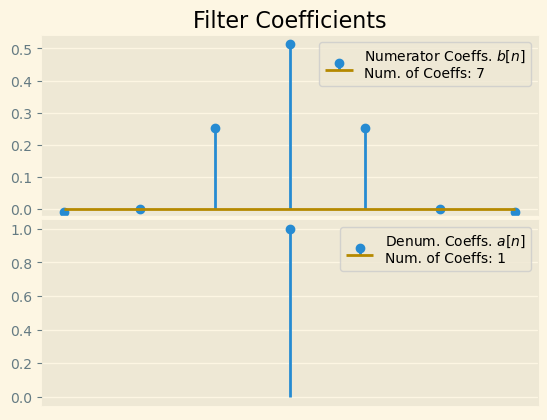

In [3]:
lti.plot_filter_coefficients(numerator_coeffs_fir)

In [4]:
pass_freqs = [.4]
stop_freqs = [.6]
pass_loss_dB = 1
stop_loss_dB = 30
numerator_coeffs_iir, denum_coeffs_iir = signal.iirdesign(pass_freqs, stop_freqs, pass_loss_dB, stop_loss_dB)
lti.equation(numerator_coeffs_iir, denum_coeffs_iir)

<IPython.core.display.Latex object>

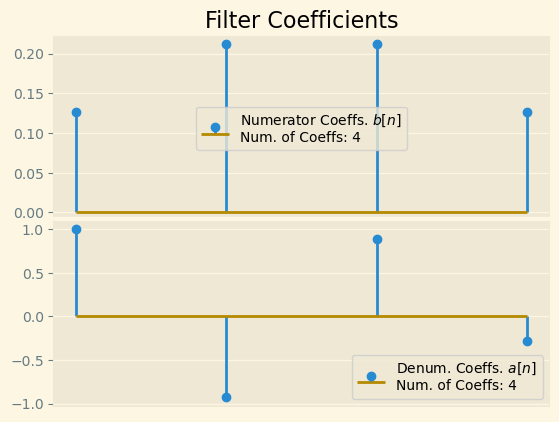

In [5]:
lti.plot_filter_coefficients(numerator_coeffs_iir, denum_coeffs_iir)

In [6]:
first_time = 0 # s
last_time = 9 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq) # s

low_freq_1 = 1 # Hz
low_freq_2 = 3 # Hz
low_freq_3 = 7 # Hz
high_freq = 38 # Hz

common_amplitude = 1
common_offset = 0

signal_low_freq_1 = fft.get_signal(low_freq_1, common_amplitude, low_freq_1, common_offset, time)
signal_low_freq_2 = fft.get_signal(low_freq_2, common_amplitude, low_freq_2, common_offset, time)
signal_low_freq_3 = fft.get_signal(low_freq_3, common_amplitude, low_freq_3, common_offset, time)
signal_high_freq = fft.get_signal(high_freq, common_amplitude, high_freq, common_offset, time)

superposition_signal =  signal_low_freq_1 + signal_low_freq_2 + signal_low_freq_3 + signal_high_freq

In [7]:
filtered_signal_fir_ver1 = signal.lfilter(numerator_coeffs_fir, [1], superposition_signal)
filtered_signal_iir_ver1 = signal.lfilter(numerator_coeffs_iir, denum_coeffs_iir, superposition_signal)
_, filter_out_fir = signal.dimpulse(signal.dlti(numerator_coeffs_fir, lti.correct_denum_coeffs(numerator_coeffs_fir, [1])))
_, filter_out_iir = signal.dimpulse(signal.dlti(numerator_coeffs_iir, lti.correct_denum_coeffs(numerator_coeffs_iir, denum_coeffs_iir)))
filtered_signal_fir_ver2 = signal.convolve(np.squeeze(filter_out_fir), superposition_signal)
filtered_signal_iir_ver2 = signal.convolve(np.squeeze(filter_out_iir), superposition_signal)
filtered_signal_fir_ver2 = filtered_signal_fir_ver2[0:len(filtered_signal_fir_ver1)]
filtered_signal_iir_ver2 = filtered_signal_iir_ver2[0:len(filtered_signal_iir_ver1)]

In [8]:
def plot_both(ver1, ver2, msg, const):
    plt.style.use('Solarize_Light2')
    fig, axis = plt.subplots(1, 1)
    fig.subplots_adjust(hspace=0)
    axis.set_title(f'{msg} Filters Represented by Convolution')
    fft.plot_signal_to_axis(axis, np.arange(len(ver1)), ver1)
    fft.plot_signal_to_axis(axis, np.arange(len(ver2)), ver2)
    fft.plot_signal_to_axis(axis, np.arange(len(ver2)), (ver2 - ver1) * (10 ** const))
    axis.legend(['lfilter', 'dimpulse, convolve, take first part', f'difference times 1e{const}'])
    plt.show()

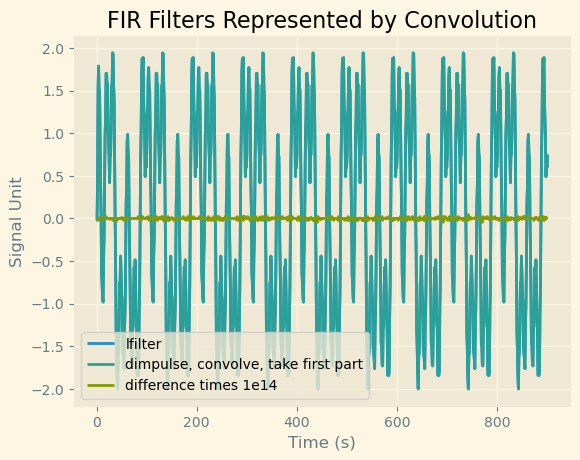

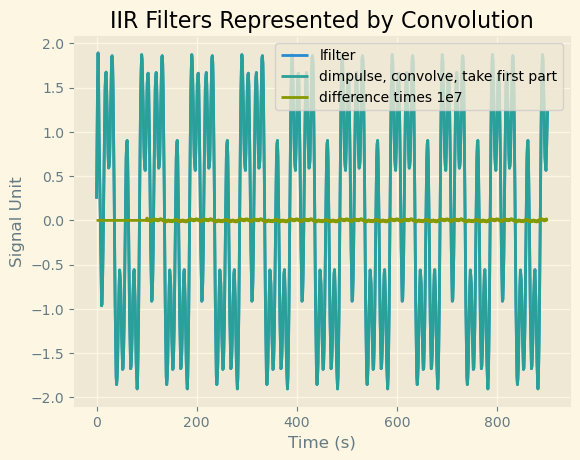

In [9]:
plot_both(filtered_signal_fir_ver1, filtered_signal_fir_ver2, 'FIR', 14)
plot_both(filtered_signal_iir_ver1, filtered_signal_iir_ver2, 'IIR', 7)

It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4DSP/)